In [4]:
import pandas as pd

In [5]:
df_discourse=pd.read_csv('discourse_full_context_semantic.csv')
#print(discourse.head())
print(df_discourse.columns)
print(type(df_discourse["perplexity"][2]))

Index(['Unnamed: 0', 'perplexity', 'entropies_sd', 'entropies_mean',
       'entropy_deviations_sd', 'entropy_deviations_mean',
       'information_content_sd', 'information_content_mean',
       'log_probabilities_sd', 'log_probabilities_mean',
       'probability_differences_sd', 'probability_differences_mean',
       'token_probabilities_sd', 'token_probabilities_mean', 'task', 'context',
       'study_id', 'sub_task', 'group', 'panss_p_total', 'panss_n_total',
       'panss_g_total', 'panss_sim_total', 'tlc_tat_total', 'tlc_panss_total',
       'tlc_conversation_total', 'tlc_panss_global', 'tlc_conversation_global',
       'tlc_tat_global'],
      dtype='object')
<class 'numpy.float64'>


In [16]:
df=df_discourse.copy()


# Columns to drop
columns_to_drop = [
    'Unnamed: 0', 'task', 'context', 'log_probabilities_sd',
       'log_probabilities_mean', 'token_probabilities_sd',
       'token_probabilities_mean', 'panss_p_total', 'panss_n_total',
    'panss_g_total', 'panss_sim_total', 'tlc_tat_total', 'tlc_panss_total',
    'tlc_conversation_total', 'tlc_panss_global', 'tlc_conversation_global',
    'tlc_tat_global'
]

# Drop the specified columns
df_cleaned = df.drop(columns=columns_to_drop)
print(df_cleaned.columns)

df_cleaned = df_cleaned[~df_cleaned['sub_task'].isin([7, 5])]
print(df_cleaned['sub_task'])


Index(['perplexity', 'entropies_sd', 'entropies_mean', 'entropy_deviations_sd',
       'entropy_deviations_mean', 'information_content_sd',
       'information_content_mean', 'probability_differences_sd',
       'probability_differences_mean', 'study_id', 'sub_task', 'group'],
      dtype='object')
0      1
1      2
2      3
3      4
5      6
      ..
720    1
721    2
722    3
723    4
725    6
Name: sub_task, Length: 524, dtype: int64


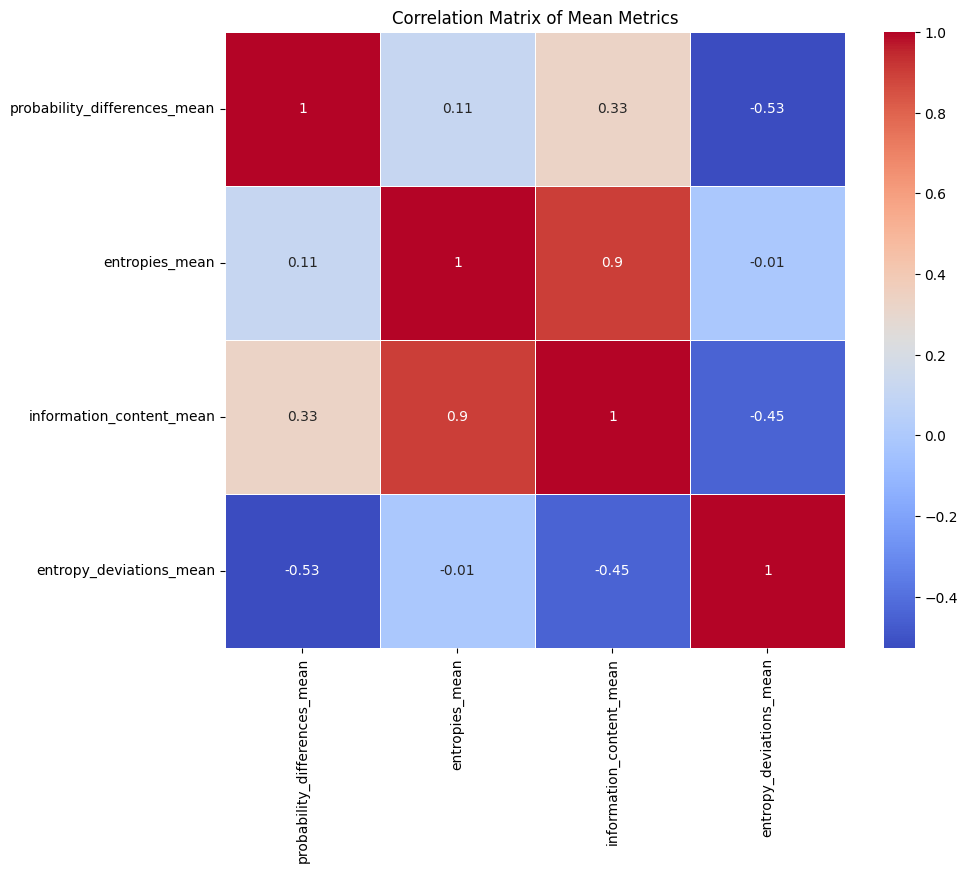

In [21]:
#correlation

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix for means
corr_matrix_means = df_cleaned[['probability_differences_mean', 'entropies_mean',
                        'information_content_mean', 
                        'entropy_deviations_mean',
                        'perplexity' #je le mets right ?
                        ]].corr() 

# Plot the heatmap for means
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_means, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Mean Metrics')
plt.show()


In [26]:
#drop the independant variable
#THIS IS DONE MANUALLY FROM SEEING INFORMATION CONTENT SHOULD BE REMOVED BUT I DO IT AUTOMATICALLY

# Drop the specified columns
df_cleaned = df_cleaned.drop(columns=['information_content_sd', 'information_content_mean'])
print(df_cleaned.columns)

KeyError: "['information_content_sd', 'information_content_mean'] not found in axis"